In [392]:
import matplotlib.pyplot as plt
import numpy as np
nmodels = 5
lambda_0_value = 10.0
T_inner_value = 300 # K
# lambda_0_value = 1.0
# T_inner_value = 150 # K
inputfile = 'sphere8_lower'
# Read the data from the file
data = np.array([])
# print(data) 
with open(inputfile+'.stb', 'r') as file:
    model = -1
    columns = {}
    for line in file:
        if line.strip().startswith('#') and line.strip().endswith('SPECTRUM'):
            model += 1
            columns[model] = []
        # Split the line into columns and convert to float
        if line.strip().startswith('#'):
            continue
        columns[model].append(list(map(float, line.split())))

In [393]:
tau0_values = []

with open(inputfile+'.spp', 'r') as file:
    for line in file:
        if line.strip().startswith('#'):
            continue
        taucol = line.split()
        tau0_values.append(float(taucol[1]))

# Now you can call on tau0_values
print(tau0_values)

data = []
lambda_cols = []

for i in range(nmodels):
    model_data = list(zip(*columns[i]))
    data.append(model_data)
    lambda_cols.append(model_data[0])

[1.0, 3.16, 10.0, 31.6, 100.0]


In [394]:
column_headers = ['lambda', 'fTot', 'xAtt', 'xDs', 'xDe', 'fInp', 'tauT', 'albedo']
column_descriptors = ['$\\lamda$', '$\\lambda*F_{\\lambda}/int(F_{\\lambda}d\\lambda)$', 'fractional contribution of the attenuated input radiation to fTot', \
                      ' fractional contribution of the scattered radiation to fTot', 'fractional contribution of the dust emission to fTot', \
                         'spectral shape of the input (unattenuated) radiation', 'overall optical depth at wavelength $\\lambda$', \
                             'albedo at wavelength lambda' ]

column_descriptors = ['$\\lamda$', '$\\lambda*F_{\\lambda}/int(F_{\\lambda}d\\lambda)$', 'fractional contribution of the attenuated input radiation to fTot', \
                      ' fractional contribution of the scattered radiation to fTot', 'fractional contribution of the dust emission to fTot', \
                         'spectral shape of the input (unattenuated) radiation', 'overall optical depth at frequency $\\nu$', \
                             'albedo at frequency $\\nu$' ]

In [395]:
h = 6.626e-34
nu_0 = 3e8/(100e-6)
k = 1.38e-23
T_0 = h*nu_0/k
print("T_0 = " + str(T_0))

#what brings values higher: beta higher (> 2), kappa_nu_0 lower, fiducial wavelength lower

def eq7_Tch(k_rho, beta, kappa_nu_0, T_0 = T_0, LMratio = 10, Sigma = 3, Ltilde = 0.87):
    sb = 5.67e-8
    Tch = ((LMratio)/(4 * sb * Ltilde * Sigma**((2.92-k_rho)/(k_rho-1))) * ((4*(k_rho-1)*T_0**beta)/((3-k_rho)*kappa_nu_0))** (1.92/(k_rho-1))) **((k_rho-1)/(1.92*beta + 4*(k_rho-1)))
    return Tch

result1 = eq7_Tch(1.5, 2.0, 0.003, Ltilde = 0.87)
print("T_ch = " + str(result1))

def eq6_Rc_tilde(k_rho, beta, kappa_nu_0,  T_0 = T_0, LMratio = 10, Sigma = 3, Ltilde = 0.87):
    ###this is a dimensionless quantity
    sb = 5.67e-8
    R_c_tilde = ((LMratio)*Sigma**((4+beta)/beta)/(4 * sb * Ltilde)*(((3-k_rho)*kappa_nu_0)/(4*(k_rho-1)*T_0**beta))**(4/beta))**(-beta/(1.92*beta + 4*(k_rho-1)))
    R_ch = 1/R_c_tilde
    return R_c_tilde, R_ch

result2 = eq6_Rc_tilde(1.5, 2.0, 0.003, Ltilde=0.87)[0]
print("R_ch_tilde = " + str(result2))

def eq11_T(T_ch, R_ch_tilde):
    k_T = 0.4
    r = 0.5
    R_c = 1
    R_ch = R_c/R_ch_tilde
    print("R_ch = " + str(R_ch))
    T = T_ch*(r/R_ch)**-k_T
    return T
result3 = eq11_T(result1, result2)
print("T = " + str(result3))

T_0 = 144.04347826086953
T_ch = 681.4707209077771
R_ch_tilde = 43.81048374696762
R_ch = 0.022825586811038485
T = 198.25674888720005


In [347]:
# plt.rcParams["font.family"] = "Arial"
from matplotlib.ticker import MultipleLocator

[(0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.15, 0.2, 0.25, 0.3, 0.36, 0.44, 0.55, 0.7, 0.85, 1.0, 1.15, 1.3, 1.7, 2.0, 2.2, 2.7, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.4, 9.55, 9.7, 9.85, 10.0, 10.5, 11.0, 11.3, 11.6, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 120.0, 130.0, 140.0, 150.0, 200.0, 250.0, 300.0, 400.0, 500.0, 700.0, 1000.0, 1500.0, 2250.0, 3350.0, 5000.0, 7400.0, 11000.0, 13000.0, 16000.0, 24000.0, 36000.0), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.988e-20, 1.628e-18, 1.222e-17, 2.971e-17, 0.0, 0.0, 0.0, 0.0, 8.035e-16, 3.088e-15, 9.367e-14, 2.047e-13, 1.006e-14, 6.21e-18, 7.557e-16, 9.022e-09, 3.963e-07, 2.804e-06, 6.411e-05, 0.0001951, 0.0007277, 0.001987, 0.004992, 0.01057, 0.01893, 0.0297, 0.0424, 0.05677, 0.07263, 0.0912, 0.1111, 0.1097, 0.07711, 0.06

<>:36: SyntaxWarning: invalid escape sequence '\i'
<>:36: SyntaxWarning: invalid escape sequence '\i'
/var/folders/34/3847lqd14j78mfm70_z1c_r00000gn/T/ipykernel_3927/1795298628.py:36: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel('$\\frac{\\nu F_{\\nu}}{\int F_{\\nu}d\\nu}$', fontsize=14)


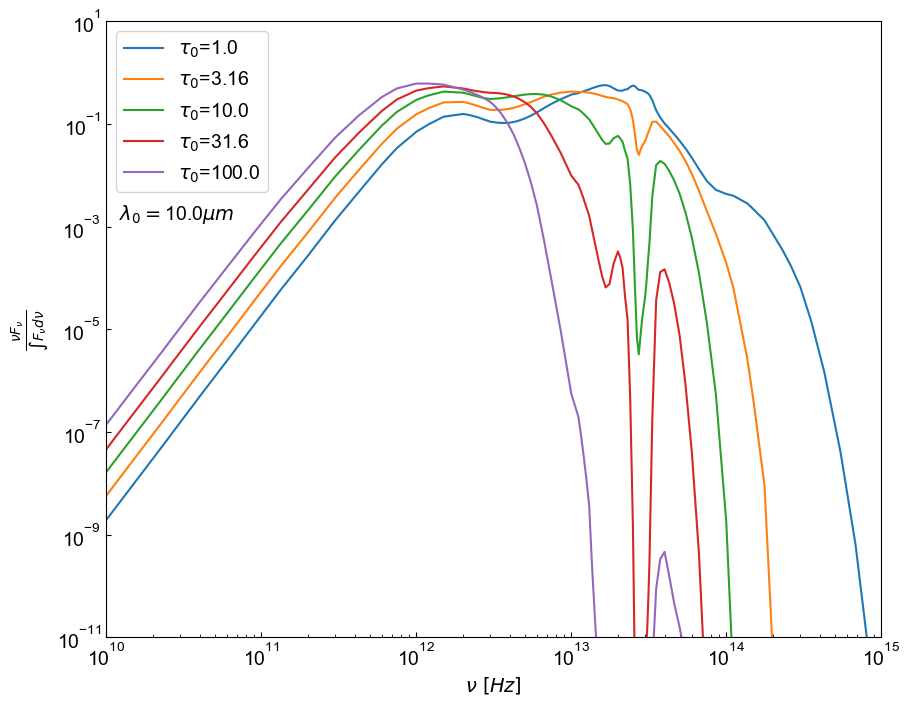

In [404]:
freq_cols = []
for lambda_col in lambda_cols:
    freq_col = [3e8 / (lam*10**-6) for lam in lambda_col]
    freq_cols.append(freq_col)

    # # Create a new object to store the result of the division
    # divided_data = []

    # # Divide all elements in data[:][1] by the corresponding element in lambda_cols
    # for i in range(nmodels):
    #     divided_model_data = [d / lam for d, lam in zip(data[i][1], lambda_cols[i])]
    #     divided_data.append(divided_model_data)
print(data[:][1])

# plt.rcParams.update(plt.rcParamsDefault)
# plt.figure(figsize=(10, 8)) 
fig, ax = plt.subplots(figsize=(10,8)) 
plt.rcParams.update({'font.size': 14})
# plt.rcParams.update({
#     'text.usetex': True,
#     'font.family': 'serif',
# })
# plt.plot(freq_cols[0], data[0][1], label=f'$\\tau$={tau0_values[0]}') # marker='o', markersize=3,
for i in range(nmodels):
    #data[i][1]
    plt.plot(freq_cols[i], data[i][1], label=f'$\\tau_0$={tau0_values[i]}') # marker='o', markersize=3,
plt.xscale('log')
plt.yscale('log')
plt.minorticks_on()
plt.xlabel('$\\nu ~ [Hz]$')
plt.minorticks_on()
plt.tick_params(axis="both", direction="in", which="both")
plt.legend(loc='upper left')
# plt.rcParams["font.family"] = "Times"
# plt.ylabel(column_headers[1])
plt.ylabel('$\\frac{\\nu F_{\\nu}}{\int F_{\\nu}d\\nu}$', fontsize=14)
# plt.title('$\\lambda*F_{\\lambda}/int(F_{\\lambda}d\lambda)$')
# same as
# plt.title('$\\lambda_0 =$'+ str(lambda_0_value) +'$\\mu m, T_{inner} = $' +str(T_inner_value)+ 'K')
# plt.text(10**11, 10**-14, 'Exhibits the 3E13 Hz absorption feature, \n Flattens more at peak', fontsize=8, color='black')
plt.text(1.2*10**10, 5*10**-4, '$\\lambda_0 =$'+ str(lambda_0_value) +'$\\mu m$ \n', fontsize=14, color='black') #'$T_{inner} = $' +str(T_inner_value)+ 'K'
plt.ylim(10**-11, 10**1)
plt.xlim(10**10, 10**15)
ax.set_yticks([10**-10, 10**-8, 10**-6, 10**-4, 10**-2, 10**0], minor=True)
plt.minorticks_on()
# plt.axes().yaxis.set_minor_locator(MultipleLocator(10**2))
# plt.yticks([10**-10, 10**-8, 10**-6, 10**-4, 10**-2, 10**0], minor=True)
# plt.gca().tick_params(axis='y', which='minor', color='r', width=2, length=5)
# plt.grid(True)
plt.savefig("sphere8_lower.png")
plt.show()

# plt.figure(figsize=(10, 6))  
# for i in range(nmodels):
#     #data[i][1]
#     plt.plot(lambda_cols[i], data[i][1], label=f'$\\tau$={tau0_values[i]}') # marker='o', markersize=3,
# plt.xscale('log')
# plt.minorticks_on()
# plt.yscale('log')
# plt.xlabel('$\\lambda ~(\\mu m)$')
# plt.legend()
# # plt.ylabel(column_headers[1])
# plt.ylabel('$\\frac{\\lambda F_{\\lambda}}{\int F_{\\lambda}d\\lambda}$', fontsize=14)
# # plt.ylim(10**-15, 10**0)
# # plt.title('$\\lambda*F_{\\lambda}/int(F_{\\lambda}d\lambda)$')
# # same as
# plt.title('$\\lambda F_{\\lambda}/int(F_{\\lambda}d\\lambda)$, for $\\lambda_0 =$'+ str(lambda_0_value) +'$\\mu m, T_{inner} = $' +str(T_inner_value)+ 'K')
# # plt.text(10E-5, 10E-3, 'Exhibits the $3E13 Hz absorption feature', fontsize=8, color='black')
# # plt.grid(True)
# plt.show()

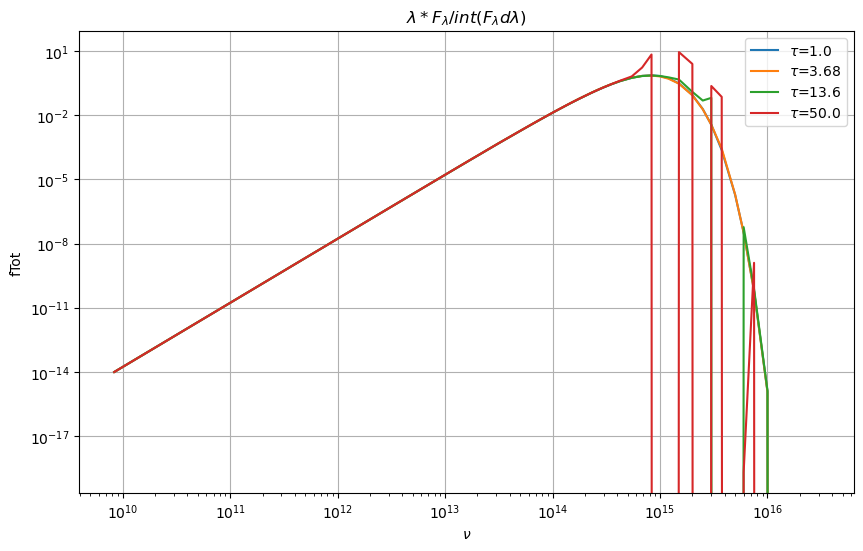

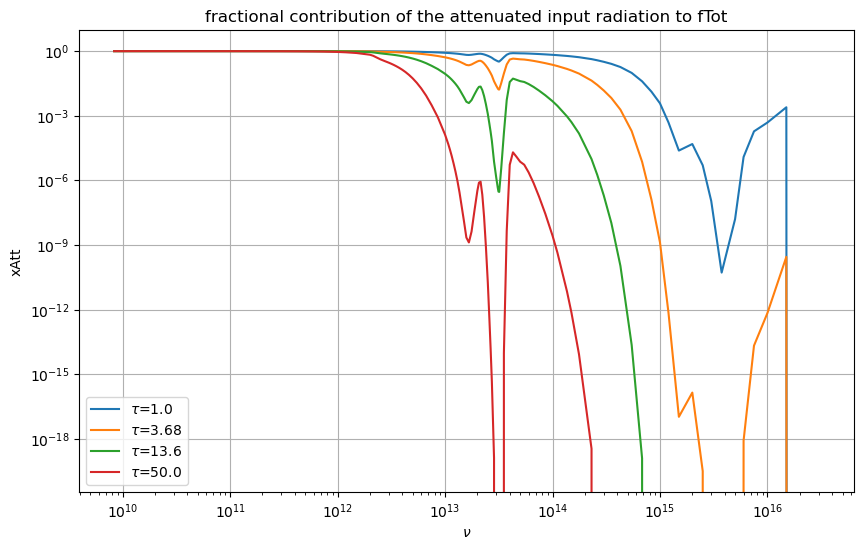

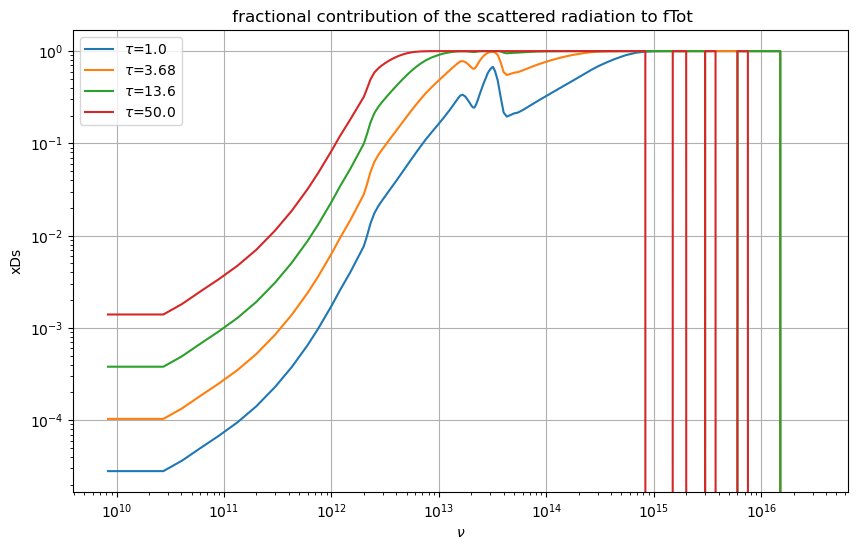

/var/folders/34/3847lqd14j78mfm70_z1c_r00000gn/T/ipykernel_3927/700619329.py:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


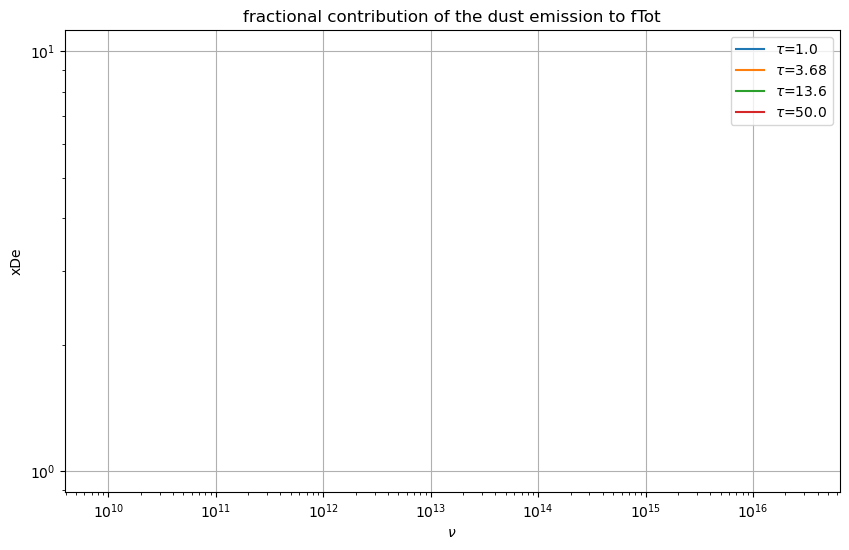

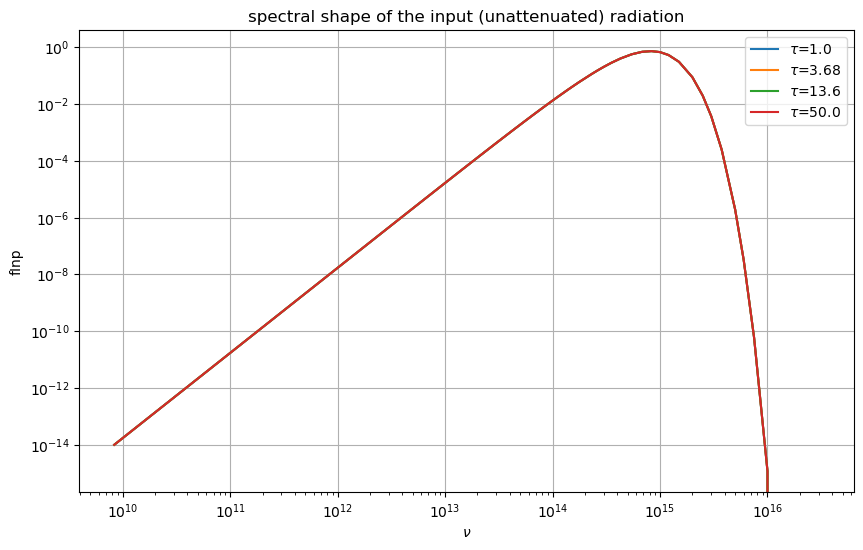

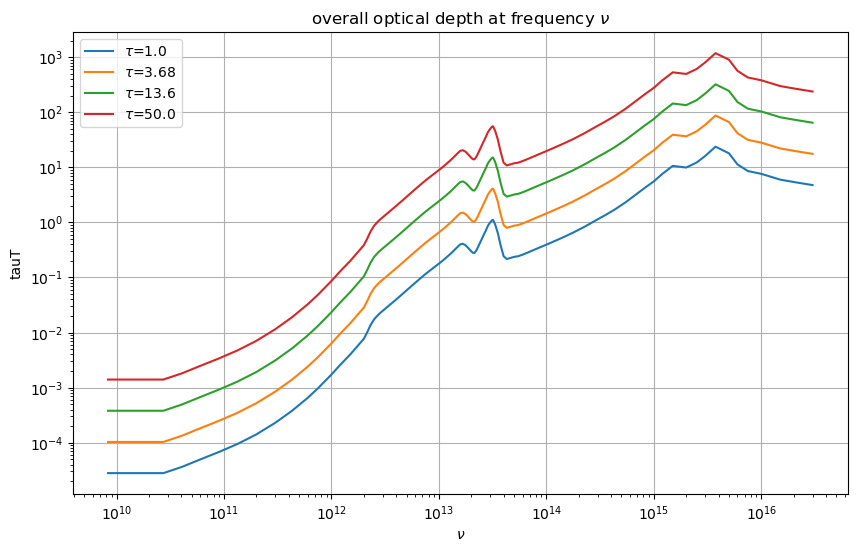

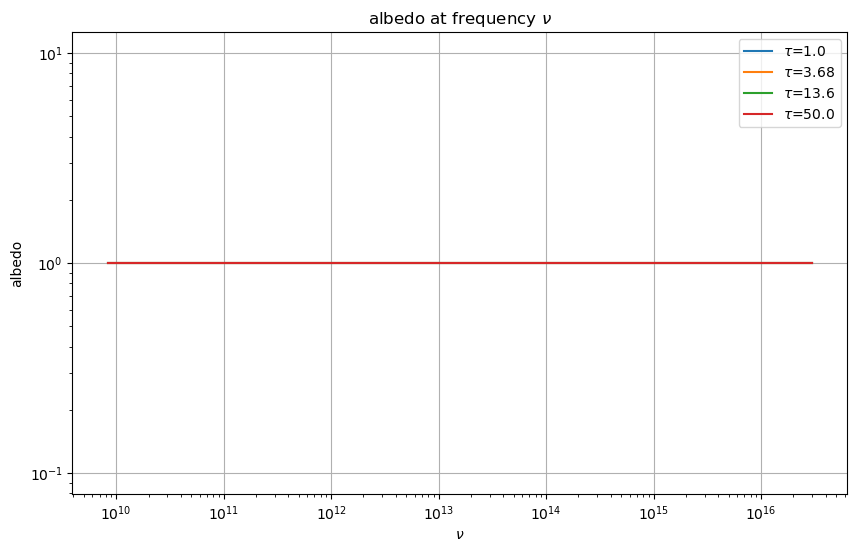

In [153]:

for j in range(1, len(data[0])):  
    plt.figure(figsize=(10, 6))  
    for i in range(nmodels):
        #data[i][1]
        plt.plot(freq_cols[i], data[i][j], label=f'$\\tau$={tau0_values[i]}') # marker='o', markersize=3,
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$\\nu$')
    plt.legend()
    plt.ylabel(column_headers[j])
    plt.title(column_descriptors[j])
    plt.grid(True)
    plt.show()

In [137]:

input_file = "wd01.txt" 
output_file = "wd01.dat"  

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    # Read the header lines and write the selected columns
    header = infile.readline()
    units = infile.readline()
    separator = infile.readline()

    # Write new headers to the output file
    outfile.write(f"lambda       C_ext/H       K_abs\n")
    outfile.write(f"(micron)     (cm^2/H)     (cm^2/g)\n")
    outfile.write(f"---------    ---------    ---------\n")

    # Process each data line
    for line in infile:
        if line.strip():  # Skip empty lines
            columns = line.split()
            lambda_col = columns[0]
            c_ext_h_col = columns[3]
            k_abs_col = columns[4]
            outfile.write(f"{lambda_col:<12} {c_ext_h_col:<12} {k_abs_col}\n")

print(f"Filtered table has been written to '{output_file}'.")


Filtered table has been written to 'wd01.dat'.
